In [2]:
#importing necessary libraries for retrieveing dataset and preprocessing the data
import pandas as pd
import kaggle
#convert the dataset the suitable format
import zipfile

In [3]:
!kaggle datasets download abdallahwagih/amazon-reviews -f Cell_Phones_and_Accessories_5.json

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/amazon-reviews
License(s): Apache 2.0




  0%|          | 0.00/44.3M [00:00<?, ?B/s]
  2%|2         | 1.00M/44.3M [00:00<00:26, 1.69MB/s]
  5%|4         | 2.00M/44.3M [00:00<00:13, 3.29MB/s]
  7%|6         | 3.00M/44.3M [00:00<00:09, 4.34MB/s]
  9%|9         | 4.00M/44.3M [00:01<00:08, 5.19MB/s]
 11%|#1        | 5.00M/44.3M [00:01<00:07, 5.47MB/s]
 14%|#3        | 6.00M/44.3M [00:01<00:06, 6.50MB/s]
 18%|#8        | 8.00M/44.3M [00:01<00:04, 7.98MB/s]
 20%|##        | 9.00M/44.3M [00:01<00:04, 8.38MB/s]
 25%|##4       | 11.0M/44.3M [00:01<00:03, 9.24MB/s]
 27%|##7       | 12.0M/44.3M [00:01<00:03, 9.41MB/s]
 29%|##9       | 13.0M/44.3M [00:02<00:03, 9.42MB/s]
 32%|###1      | 14.0M/44.3M [00:02<00:03, 9.42MB/s]
 34%|###3      | 15.0M/44.3M [00:02<00:03, 9.55MB/s]
 36%|###6      | 16.0M/44.3M [00:02<00:03, 9.52MB/s]
 38%|###8      | 17.0M/44.3M [00:02<00:03, 9.32MB/s]
 41%|####      | 18.0M/44.3M [00:02<00:02, 9.60MB/s]
 43%|####2     | 19.0M/44.3M [00:02<00:02, 9.60MB/s]
 45%|####5     | 20.0M/44.3M [00:02<00:02, 9.60MB/s]
 

In [5]:
with zipfile.ZipFile('Cell_Phones_and_Accessories_5.json.zip', 'r')as zip_ref:
    zip_ref.extractall('data')
    
#load the dataset into the dataframe using pandas library
df = pd.read_json('data/Cell_Phones_and_Accessories_5.json', lines=True)
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [6]:
df.shape

(194439, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [8]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      3519
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [9]:
#lower case the text fields
df['reviewText']=df['reviewText'].str.lower()
df['summary']=df['summary'].str.lower()

In [12]:
#covert the unix review time to readable time format
df['reviewTime']=pd.to_datetime(df['unixReviewTime'], unit='s')

In [13]:
#drop unncessary columns
df.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime'], inplace=True)

In [14]:
#define a function to label sentiment based on overall ratings
def sentiment_label(overall_rating):
    if overall_rating >=4:
        return 'Positive'
    elif overall_rating <=2:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['overall'].apply(sentiment_label)

In [15]:
#import necessary packages for textual processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#define text preprocessing function
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return ''.join(filtered_text)
df['processed_reviewText'] = df['reviewText'].apply(preprocess_text)

In [17]:
output_file_path = 'cleaned_processed_reviews.csv'
df.to_csv(output_file_path, index=False)

In [18]:
preprocess_reviews = pd.read_csv('cleaned_processed_reviews.csv')
preprocess_reviews.head()

,reviewText,overall,summary,reviewTime,sentiment,processed_reviewText
0,they look good and stick good! i just don't li...,4,looks good,2014-05-21,Positive,lookgoodstickgoodlikeroundedshapealwaysbumping...
1,these stickers work like the review says they ...,5,really great product.,2014-01-14,Positive,stickersworklikereviewsaysstickgreatstayphones...
2,these are awesome and make my phone look so st...,5,love love love,2014-06-26,Positive,awesomemakephonelookstylishusedonefaralmostyea...
3,item arrived in great time and was in perfect ...,4,cute!,2013-10-21,Positive,itemarrivedgreattimeperfectconditionhoweverord...
4,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,2013-02-03,Positive,awesomestayslooksgreatusedmultipleappleproduct...


In [22]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])
X=df['processed_reviewText']
y=df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
#feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test).toarray()

In [26]:
#train XGBoost Model
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metrics='mloglass')
model.fit(X_train_tfidf, y_train)

C:\Users\Suhas\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:17:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='mloglass', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [27]:
#model evaluation
#prediction

y_pred = model.predict(X_test_tfidf)

In [28]:
#classification report and accuracy score
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.25      0.00      0.00      4890
     Neutral       0.00      0.00      0.00      4209
    Positive       0.77      1.00      0.87     29789

    accuracy                           0.77     38888
   macro avg       0.34      0.33      0.29     38888
weighted avg       0.62      0.77      0.66     38888

Accuracy Score:
0.7659432215593499


In [29]:
#save model and vectorizer
import pickle

model_file = 'sentiment_model.pkl'
vectorizer_file = 'tfidf_vectorizer.pkl'
label_encoder_file = 'label_encoder.pkl'

with open(model_file, 'wb') as f:
    pickle.dump(model, f)

with open(vectorizer_file, 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open(label_encoder_file, 'wb') as f:
    pickle.dump(label_encoder, f)

print(f"Model and vectorizer saved as '{model_file}' and '{vectorizer_file}', and '{label_encoder_file}'.")


Model and vectorizer saved as 'sentiment_model.pkl' and 'tfidf_vectorizer.pkl', and 'label_encoder.pkl'.


Confusion Matrix:
[[    1     0  4889]
 [    1     0  4208]
 [    2     2 29785]]


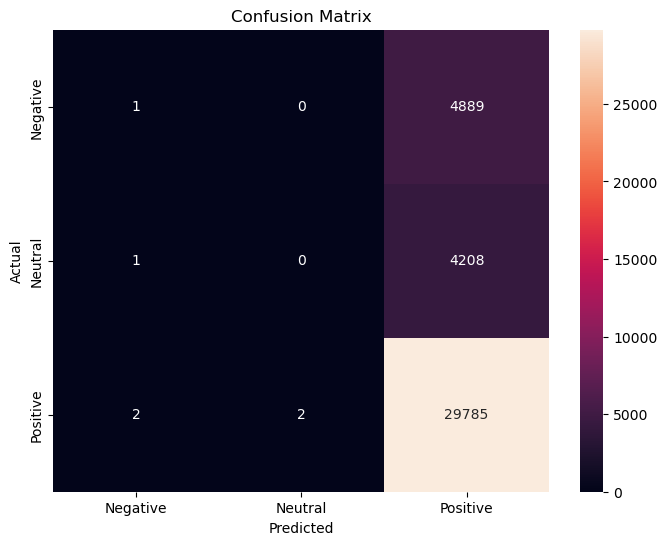

In [30]:
#confusion matrix 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [31]:
#precision, Recall and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.6182353785316677
Recall: 0.7659432215593499
F1 Score: 0.6645507136768537
